In [80]:
# Library imports
# Data treatment
# ==============================================================================
import numpy as np
import pandas as pd
import math
#from tabulate import tabulate

# Graphics
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocessing and modeling
# ==============================================================================
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RepeatedKFold
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.datasets import make_blobs
#from sklearn.metrics import euclidean_distances
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import Ridge

#from skopt.space import Real, Integer
#from skopt.utils import use_named_args
#from skopt import gp_minimize
#from skopt.plots import plot_convergence

# Several
# ==============================================================================
#import multiprocessing
#import random
#from itertools import product

# intall fitter
!pip install fitter
# Library import fitter
from fitter import Fitter, get_common_distributions
!pip install transformers
from transformers import pipeline

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [7]:
# Dataset reading and obtaining information on dataset size, type of variables and missing data in the dataset
data = pd.read_csv("train.csv", sep=",")
print("dataset size")
data.shape
print("dataset information")
data.info()
print("check missing data")
data.isna().sum().sort_values()

dataset size
dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         1714 non-null   int64  
 1   latitude      1714 non-null   float64
 2   longitude     1714 non-null   float64
 3   year          1714 non-null   int64  
 4   example_path  1714 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 67.1+ KB
check missing data


label           0
latitude        0
longitude       0
year            0
example_path    0
dtype: int64

In [9]:
# Data
data

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png
...,...,...,...,...,...
1709,0,3.819464,117.636112,2016,train_test_data/train/550.png
1710,0,-1.809594,111.531951,2005,train_test_data/train/2264.png
1711,1,0.443397,112.200163,2012,train_test_data/train/1486.png
1712,2,-1.978349,101.970148,2012,train_test_data/train/1170.png


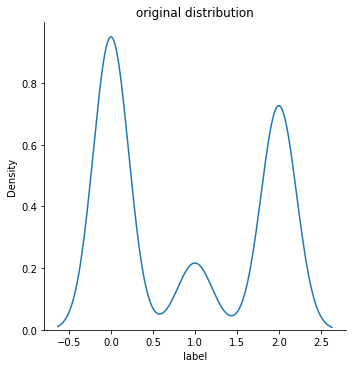

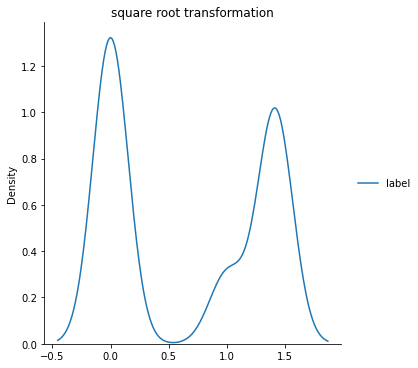

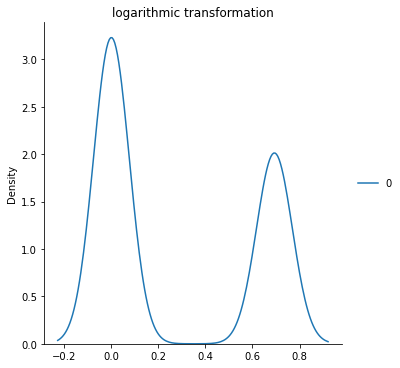

In [38]:
# study the distribution of the response variable
# original distribution
sns.displot(data["label"], kind="kde").set(title='original distribution')
# square root transformation
datasqrt = pd.DataFrame(np.sqrt(data["label"]))
sns.displot(datasqrt, kind="kde").set(title='square root transformation')
# logarithmic transformation
List = []
for i in data["label"]:
    if i == 0:
        List.append(i)
    else:
        List.append(math.log(i))
datalog = pd.DataFrame(List)
sns.displot(datalog, kind="kde").set(title='logarithmic transformation')

In [46]:
# distribution to which the data best fit
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(data.label, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,675.935083,532.068685,-1572.516778,inf,0.500490,0.000000e+00
beta,887.945711,387.175325,-1097.467743,inf,0.387470,3.780692e-232
powerlaw,957.510172,158.484268,-975.634611,inf,0.501750,0.000000e+00
chi2,967.415238,251.476341,-957.995034,inf,0.501750,0.000000e+00
exponpow,983.234872,185.892056,-930.193589,inf,0.501750,0.000000e+00
expon,993.628203,205.640268,-919.617344,inf,0.501750,0.000000e+00
norm,1016.757459,213.889727,-880.176857,inf,0.329371,3.783377e-166
logistic,1017.275874,224.388266,-879.303161,inf,0.305373,2.335154e-142
cauchy,1030.517436,8647.509524,-857.136518,inf,0.499864,0.000000e+00


In [47]:
# numeric variables
# ==============================================================================
data.select_dtypes(include=['float64', 'int']).describe()

,label,latitude,longitude,year
count,1714.000000,1714.000000,1714.000000,1714.000000
mean,0.882147,-0.458578,108.696539,2009.770712
std,0.933952,2.146293,9.136482,4.206081
min,0.000000,-8.318462,95.902427,2001.000000
25%,0.000000,-1.916629,101.627073,2007.000000
50%,0.000000,-0.417759,104.104074,2010.000000
75%,2.000000,1.062408,114.274851,2013.000000
max,2.000000,5.014370,140.900849,2016.000000


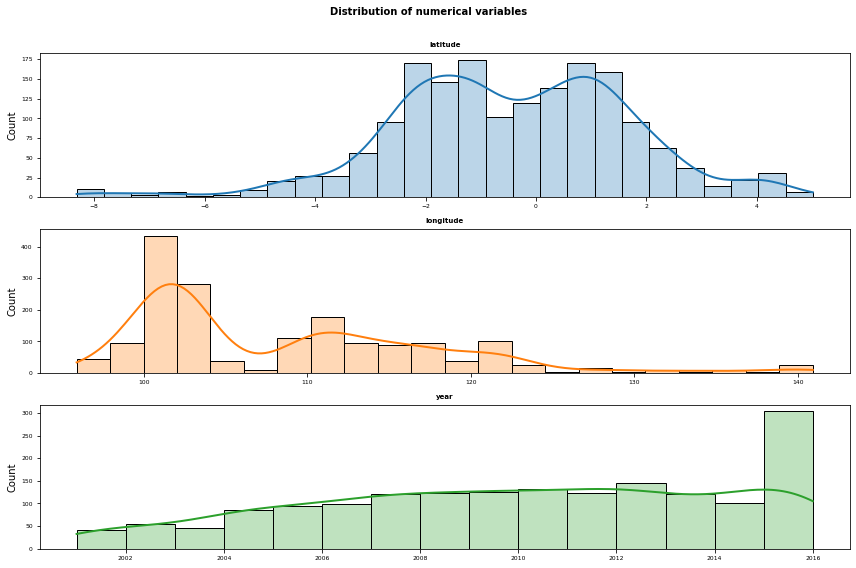

In [53]:
# Distribution plot for each numerical variable
# ==============================================================================
# Adjust number of subplots based on number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('label')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution of numerical variables', fontsize = 10, fontweight = "bold");

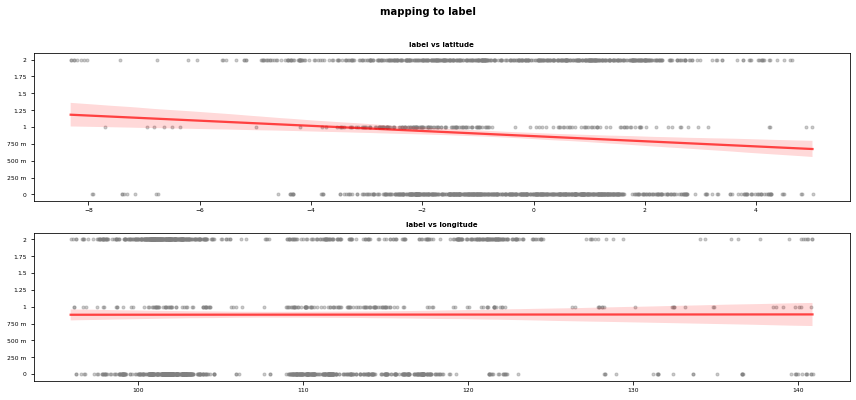

In [60]:
# Distribution plot for each numerical variable
# ==============================================================================
# Adjust number of subplots based on number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('label')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = data[colum],
        y           = data['label'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"label vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
for i in [2]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('mapping to label', fontsize = 10, fontweight = "bold");

In [61]:
# Correlation between numeric columns
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Function to convert a pandas correlation matrix to tidy format
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
6,latitude,longitude,-0.439139,0.439139
9,longitude,latitude,-0.439139,0.439139
11,longitude,year,0.192967,0.192967
14,year,longitude,0.192967,0.192967
1,label,latitude,-0.087783,0.087783
4,latitude,label,-0.087783,0.087783
7,latitude,year,-0.076184,0.076184
13,year,latitude,-0.076184,0.076184
3,label,year,0.066380,0.066380
12,year,label,0.066380,0.066380


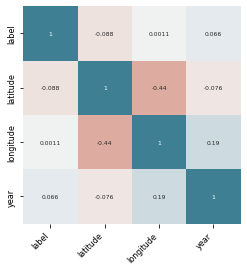

In [62]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [63]:
# Qualitative variables (object type)
# ==============================================================================
data.select_dtypes(include=['object']).describe()

,example_path
count,1714
unique,1714
top,train_test_data/train/1297.png
freq,1


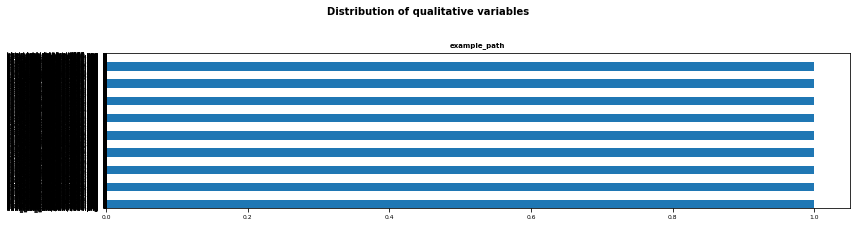

In [68]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    data[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Empty axes are removed
for i in [1, 2]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribution of qualitative variables',
             fontsize = 10, fontweight = "bold");

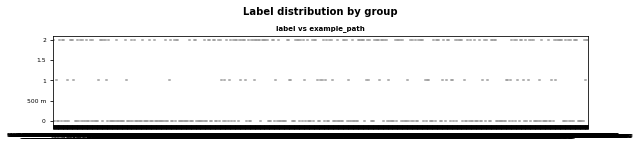

In [70]:
# Graph relationship between price and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 5))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'label',
        data  = data,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"label vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
for i in [1, 2]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Label distribution by group', fontsize = 10, fontweight = "bold");

In [89]:
# The train dataset was divided into 4
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop('label', axis = 'columns'),
                                        data['label'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [90]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
# preprocessed
# ==============================================================================

# Identification of numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformations for numeric variables
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformations for categorical variables
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# The preprocessing steps and the model are combined in the same pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================
# The result is assigned to _ so that it is not printed on the screen
_ = pipe.fit(X=X_train, y=y_train)

In [93]:
# Repeated cross validation with multiple metrics
# ==============================================================================
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# The dictionary is converted to a dataframe to facilitate visualization
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.031000,0.012996,0.010383,0.753224,-0.919973,-0.468552
1,0.019999,0.010008,0.014655,0.752982,-0.941200,-0.462747
2,0.025003,0.015994,-0.010230,0.755747,-0.942061,-0.463030
3,0.029000,0.010999,0.011594,0.753745,-0.931235,-0.465160
4,0.024009,0.010001,0.018087,0.753021,-0.931392,-0.465026
5,0.024993,0.012001,0.006839,0.754305,-0.931381,-0.465097
6,0.020007,0.011000,-0.010687,0.755039,-0.933839,-0.465535
7,0.020000,0.011000,0.010816,0.753895,-0.943564,-0.462011
8,0.019001,0.011000,0.012130,0.753032,-0.926562,-0.466724
9,0.020000,0.011000,-0.000853,0.754809,-0.926925,-0.466329


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


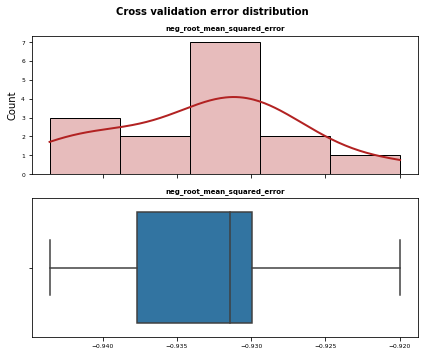

In [94]:
# Cross validation error distribution
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), sharex=True)

sns.histplot(
    data    = cv_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 6)
axes[0].set_xlabel("")
    
sns.boxplot(
    cv_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('neg_root_mean_squared_error', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 6)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Cross validation error distribution', fontsize = 10,
             fontweight = "bold");

C:\Users\nebra\AppData\Local\Temp/ipykernel_12716/613942418.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


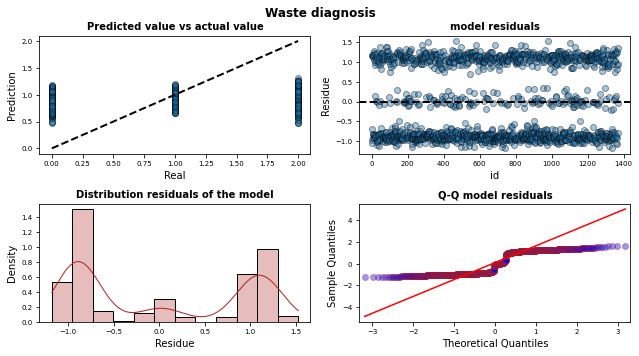

In [95]:
# Diagnostic errors (residuals) of cross-validation predictions
# ==============================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# cross validation
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# Graphics
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted value vs actual value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('model residuals', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residue')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution residuals of the model', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residue")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model residuals', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Waste diagnosis', fontsize = 12, fontweight = "bold");

In [102]:
# Prediction
predicciones = pipe.predict(X_test)

In [103]:
# A dataframe is created with the predictions and the actual value
df_predicciones = pd.DataFrame({'label' : y_test, 'prediction' : predicciones})
df_predicciones.head()

,label,prediction
1016,2,0.806150
1541,2,0.735384
454,0,0.866263
889,0,0.937558
222,0,0.760271


In [104]:
# neg_root_mean_squared_error test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

0.9154204840393939

In [128]:
import json
my_dict = df_predicciones["prediction"].to_dict()
#print(my_dict)
for key, value in my_dict.items():
    my_dict[key] = int(my_dict[key])

my_dict_ord = {k: v for k, v in sorted(my_dict.items())}
#print(my_dict_ord)
my_dict_final = {
    "target": my_dict_ord
}
print(my_dict_final)
with open("predictions.json", 'w') as file:
    json.dump(my_dict_final, file)

{'target': {4: 0, 14: 0, 20: 0, 22: 0, 28: 0, 34: 0, 35: 1, 42: 0, 47: 0, 57: 0, 62: 0, 66: 0, 76: 1, 77: 0, 78: 0, 85: 1, 87: 0, 90: 0, 92: 0, 95: 0, 108: 0, 110: 0, 113: 0, 123: 0, 124: 0, 130: 0, 132: 0, 139: 0, 140: 0, 141: 0, 142: 0, 148: 0, 154: 0, 156: 0, 162: 0, 173: 0, 181: 0, 184: 0, 188: 0, 190: 0, 192: 0, 198: 0, 202: 0, 208: 0, 216: 0, 218: 1, 220: 0, 222: 0, 234: 0, 235: 1, 237: 0, 243: 0, 254: 0, 255: 0, 256: 0, 263: 0, 265: 1, 276: 0, 281: 0, 284: 0, 299: 1, 301: 0, 312: 0, 313: 0, 315: 0, 319: 0, 324: 0, 331: 0, 338: 0, 344: 0, 347: 1, 350: 0, 351: 0, 352: 0, 355: 0, 358: 1, 362: 0, 364: 0, 366: 0, 370: 0, 381: 0, 385: 0, 386: 0, 389: 0, 397: 0, 406: 0, 409: 1, 411: 0, 414: 1, 415: 0, 438: 0, 443: 0, 444: 0, 454: 0, 463: 0, 466: 0, 474: 0, 477: 0, 483: 0, 485: 0, 488: 0, 489: 0, 497: 0, 500: 1, 504: 0, 506: 0, 507: 0, 524: 1, 535: 0, 541: 0, 547: 0, 548: 0, 564: 0, 566: 0, 577: 0, 587: 0, 596: 0, 599: 0, 616: 0, 622: 0, 624: 0, 631: 1, 636: 0, 643: 0, 646: 0, 651: 0, 6